## introduction to deep learning with pytorch

https://campus.datacamp.com/courses/introduction-to-deep-learning-with-pytorch/training-our-first-neural-network-with-pytorch?ex=4

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn

In [2]:
F.one_hot(torch.tensor(0), num_classes=3)

tensor([1, 0, 0])

In [3]:
F.one_hot(torch.tensor(1), num_classes=3)

tensor([0, 1, 0])

In [4]:
F.one_hot(torch.tensor(2), num_classes=3)

tensor([0, 0, 1])

In [5]:
from torch.nn import CrossEntropyLoss

scores = torch.tensor([[-10.8211, -8.01059, 0.9956]])
one_hot_target = torch.tensor([[0, 0, 1]])

criterion = CrossEntropyLoss()
loss = criterion(scores.double(), one_hot_target.double())
print(f"scores: {scores}, one_hot_target: {one_hot_target} -> CrossEntropyLoss: {loss}")

scores: tensor([[-10.8211,  -8.0106,   0.9956]]), one_hot_target: tensor([[0, 0, 1]]) -> CrossEntropyLoss: 0.00013002012561412688


In [6]:
X_train = torch.tensor([[-10.8211, -8.01059, 0.9956]])
y_train = torch.tensor([[1.0, 0.0]])
model = nn.Sequential(nn.Linear(3,4),
                      nn.Linear(4,4),
                      nn.Linear(4,2))
prediction = model(X_train)
print(prediction)
print(f"Layer0 -> weight grad: {model[0].weight.grad} , bias grad: {model[0].bias.grad}")
print(f"Layer1 -> weight grad: {model[1].weight.grad} , bias grad: {model[1].bias.grad}")
print(f"Layer2 -> weight grad: {model[2].weight.grad} , bias grad: {model[2].bias.grad}")
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
loss = criterion(prediction, y_train)
loss.backward()
optimizer.step()
print(f"Layer0 -> weight grad: {model[0].weight.grad} , bias grad: {model[0].bias.grad}")
print(f"Layer1 -> weight grad: {model[1].weight.grad} , bias grad: {model[1].bias.grad}")
print(f"Layer2 -> weight grad: {model[2].weight.grad} , bias grad: {model[2].bias.grad}")     
print(prediction)
prediction = model(X_train)
loss = criterion(prediction, y_train)
loss.backward()
optimizer.step()
print(f"Layer0 -> weight grad: {model[0].weight.grad} , bias grad: {model[0].bias.grad}")
print(f"Layer1 -> weight grad: {model[1].weight.grad} , bias grad: {model[1].bias.grad}")
print(f"Layer2 -> weight grad: {model[2].weight.grad} , bias grad: {model[2].bias.grad}")  

tensor([[ 0.1830, -0.5534]], grad_fn=<AddmmBackward0>)
Layer0 -> weight grad: None , bias grad: None
Layer1 -> weight grad: None , bias grad: None
Layer2 -> weight grad: None , bias grad: None
Layer0 -> weight grad: tensor([[ 0.1645,  0.1218, -0.0151],
        [-0.4106, -0.3040,  0.0378],
        [ 0.3686,  0.2729, -0.0339],
        [ 0.1265,  0.0937, -0.0116]]) , bias grad: tensor([-0.0152,  0.0379, -0.0341, -0.0117])
Layer1 -> weight grad: tensor([[-0.1230, -0.0959, -0.1760, -0.0831],
        [ 0.1918,  0.1495,  0.2745,  0.1296],
        [ 0.1264,  0.0985,  0.1809,  0.0854],
        [-0.2899, -0.2260, -0.4150, -0.1959]]) , bias grad: tensor([-0.0253,  0.0395,  0.0260, -0.0597])
Layer2 -> weight grad: tensor([[ 0.2328,  0.6723, -0.1817, -1.0084],
        [-0.2328, -0.6723,  0.1817,  1.0084]]) , bias grad: tensor([-0.3238,  0.3238])
tensor([[ 0.1830, -0.5534]], grad_fn=<AddmmBackward0>)
Layer0 -> weight grad: tensor([[ 0.3308,  0.2449, -0.0304],
        [-0.8208, -0.6076,  0.0755],
   

In [7]:
import pandas as pd
import torch
from io import StringIO

# Dataset als String
dataset_str = """experience_level,employment_type,remote_ratio,company_size,salary_in_usd
1,1,0.5,1,0.62
0,0,1.0,0,0.31
2,1,0.0,1,0.78
1,0,0.5,0,0.45
0,1,1.0,1,0.17
2,0,0.0,0,0.93
1,1,1.0,1,0.28
0,0,0.5,1,0.07"""

# DataFrame erstellen
df = pd.read_csv(StringIO(dataset_str))

# Daten in PyTorch-Tensoren umwandeln
features = torch.tensor(df[['experience_level', 'employment_type', 'remote_ratio', 'company_size']].values, dtype=torch.float32)
labels = torch.tensor(df['salary_in_usd'].values, dtype=torch.float32)
df.head(10)

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,1,1,0.5,1,0.62
1,0,0,1.0,0,0.31
2,2,1,0.0,1,0.78
3,1,0,0.5,0,0.45
4,0,1,1.0,1,0.17
5,2,0,0.0,0,0.93
6,1,1,1.0,1,0.28
7,0,0,0.5,1,0.07


In [8]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(labels).float())
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

model = nn.Sequential(nn.Linear(4,8),                                            
                      nn.LeakyReLU(),
                      nn.Linear(8,1))
for parameter in model.parameters():
    print(parameter.numel())

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.95)

epochs = 1000
for epoch in range(epochs):
    for data in dataloader:
        optimizer.zero_grad()
        X_train, y_train = data
        prediction = model(X_train)
        loss = criterion(prediction, y_train)        
        loss.backward()
        optimizer.step()
    print(f"epoch: {epoch}, train loss: {loss}")

C:\Users\mscho\AppData\Local\Temp\ipykernel_21564\2336889966.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(labels).float())
c:\Users\mscho\anaconda3\envs\pytorch_cuda\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


32
8
8
1
epoch: 0, train loss: 0.718899667263031
epoch: 1, train loss: 0.713678240776062
epoch: 2, train loss: 0.7035935521125793
epoch: 3, train loss: 0.6890721917152405
epoch: 4, train loss: 0.6705911755561829
epoch: 5, train loss: 0.6486623883247375
epoch: 6, train loss: 0.6238166093826294
epoch: 7, train loss: 0.5965896844863892
epoch: 8, train loss: 0.5675092935562134
epoch: 9, train loss: 0.5370850563049316
epoch: 10, train loss: 0.5057991743087769
epoch: 11, train loss: 0.4741002321243286
epoch: 12, train loss: 0.44239774346351624
epoch: 13, train loss: 0.41105958819389343
epoch: 14, train loss: 0.38038256764411926
epoch: 15, train loss: 0.35060837864875793
epoch: 16, train loss: 0.3220294415950775
epoch: 17, train loss: 0.29481926560401917
epoch: 18, train loss: 0.2691366672515869
epoch: 19, train loss: 0.24512669444084167
epoch: 20, train loss: 0.2228783369064331
epoch: 21, train loss: 0.20244917273521423
epoch: 22, train loss: 0.18386855721473694
epoch: 23, train loss: 0.1671

In [9]:
import torch
import torch.nn as nn

# Hyperparameter
input_size = 4  # Anzahl der Eingabe-Features
hidden_size = 8  # Größe der versteckten Schicht
output_size = 1  # Eine einzelne Ausgabe für salary_in_usd

model = nn.Sequential(nn.Linear(input_size,hidden_size),                                            
                      nn.ReLU(),
                      nn.Linear(hidden_size,output_size))

# Definiere Verlustfunktion und Optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Trainingsschleife
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward-Pass
    outputs = model(features)
    loss = criterion(outputs, labels)

    # Backpropagation und Optimierung
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Vorhersagen
predicted = model(features)
print('Vorhersagen:', predicted)

Epoch [1/1000], Loss: 0.5423
Epoch [2/1000], Loss: 0.5167
Epoch [3/1000], Loss: 0.4925
Epoch [4/1000], Loss: 0.4698
Epoch [5/1000], Loss: 0.4484
Epoch [6/1000], Loss: 0.4282
Epoch [7/1000], Loss: 0.4093
Epoch [8/1000], Loss: 0.3914
Epoch [9/1000], Loss: 0.3747
Epoch [10/1000], Loss: 0.3589
Epoch [11/1000], Loss: 0.3441
Epoch [12/1000], Loss: 0.3303
Epoch [13/1000], Loss: 0.3172
Epoch [14/1000], Loss: 0.3050
Epoch [15/1000], Loss: 0.2938
Epoch [16/1000], Loss: 0.2833
Epoch [17/1000], Loss: 0.2734
Epoch [18/1000], Loss: 0.2641
Epoch [19/1000], Loss: 0.2554
Epoch [20/1000], Loss: 0.2472
Epoch [21/1000], Loss: 0.2396
Epoch [22/1000], Loss: 0.2324
Epoch [23/1000], Loss: 0.2257
Epoch [24/1000], Loss: 0.2194
Epoch [25/1000], Loss: 0.2135
Epoch [26/1000], Loss: 0.2079
Epoch [27/1000], Loss: 0.2028
Epoch [28/1000], Loss: 0.1979
Epoch [29/1000], Loss: 0.1934
Epoch [30/1000], Loss: 0.1891
Epoch [31/1000], Loss: 0.1851
Epoch [32/1000], Loss: 0.1814
Epoch [33/1000], Loss: 0.1779
Epoch [34/1000], Lo

In [10]:
import torch.nn as nn
layer = nn.Linear(64, 128)
print(layer.weight.min(), layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)


In [11]:
import torch.nn as nn
layer = nn.Linear(64, 128)
nn.init.uniform_(layer.weight)
print(layer.weight.min(), layer.weight.max())

tensor(0.0002, grad_fn=<MinBackward1>) tensor(0.9999, grad_fn=<MaxBackward1>)


In [13]:
# freeze layers
import torch.nn as nn

model = nn.Sequential(nn.Linear(64, 128),
                      nn.Linear(128,64))

for name, param in model.named_parameters():    
    if name == "0.weight":
        param.requires_grad = False
    print(f"name: {name}, requires_grad: {param.requires_grad}")

name: 0.weight, requires_grad: False
name: 0.bias, requires_grad: True
name: 1.weight, requires_grad: True
name: 1.bias, requires_grad: True


In [15]:
import torch
import pandas as pd
from io import StringIO

# Dataset string
dataset_str = """hair,feathers,eggs,milk,predator,fins,legs,tail,animal_type,type
1,0,0,1,0,0,4,1,1,mammal
0,1,1,0,1,0,2,1,2,bird
0,0,1,0,0,0,4,1,3,reptile
0,0,0,0,1,1,0,1,4,fish
1,0,0,1,0,0,4,1,1,mammal
0,1,1,0,1,0,2,1,2,bird
0,0,1,0,1,0,4,1,3,reptile
0,0,0,0,0,1,0,1,4,fish
1,0,0,1,1,0,4,1,1,mammal
0,1,1,0,0,0,2,1,2,bird
0,0,1,0,0,0,4,1,3,reptile
0,0,0,0,0,1,0,1,4,fish
0,0,1,0,0,0,4,1,3,reptile
1,0,0,1,0,0,4,1,1,mammal
0,0,1,0,0,0,6,0,5,amphibian
0,0,0,0,0,0,6,0,6,bug
0,0,0,0,0,0,8,0,7,invertebrate
0,1,1,0,1,0,2,1,2,bird
1,0,0,1,1,0,4,1,1,mammal
0,0,0,0,1,1,0,1,4,fish
1,0,0,1,0,0,4,1,1,mammal
0,1,1,0,1,0,2,1,2,bird
0,0,1,0,0,0,4,1,3,reptile
0,0,0,0,1,1,0,1,4,fish
1,0,0,1,0,0,4,1,1,mammal
0,1,1,0,1,0,2,1,2,bird
0,0,1,0,1,0,4,1,3,reptile
0,0,0,0,0,1,0,1,4,fish
1,0,0,1,1,0,4,1,1,mammal
0,1,1,0,0,0,2,1,2,bird
0,0,1,0,0,0,4,1,3,reptile
0,0,0,0,0,1,0,1,4,fish
0,0,1,0,0,0,4,1,3,reptile
1,0,0,1,0,0,4,1,1,mammal
0,0,1,0,0,0,6,0,5,amphibian
0,0,0,0,0,0,6,0,6,bug
0,0,0,0,0,0,8,0,7,invertebrate
0,1,1,0,1,0,2,1,2,bird
1,0,0,1,1,0,4,1,1,mammal
0,0,0,0,1,1,0,1,4,fish
"""

# Read data from string into a DataFrame
df = pd.read_csv(StringIO(dataset_str))

print(df[['animal_type','type']])

features = torch.tensor(df[['hair', 'feathers', 'eggs', 'milk', 'predator', 'fins', 'legs', 'tail']].values, dtype=torch.float)
#labels = torch.tensor(df['type'].apply(lambda x: ['mammal', 'bird', 'reptile', 'fish', 'amphibian', 'bug', 'invertebrate'].index(x)), dtype=torch.long)

labels = torch.tensor(df['animal_type'], dtype=torch.float)

print("Features:")
print(features)
print("\nLabels:")
print(labels)

    animal_type          type
0             1        mammal
1             2          bird
2             3       reptile
3             4          fish
4             1        mammal
5             2          bird
6             3       reptile
7             4          fish
8             1        mammal
9             2          bird
10            3       reptile
11            4          fish
12            3       reptile
13            1        mammal
14            5     amphibian
15            6           bug
16            7  invertebrate
17            2          bird
18            1        mammal
19            4          fish
20            1        mammal
21            2          bird
22            3       reptile
23            4          fish
24            1        mammal
25            2          bird
26            3       reptile
27            4          fish
28            1        mammal
29            2          bird
30            3       reptile
31            4          fish
32        

In [18]:
import torch
from torch.utils.data import TensorDataset, random_split

tensordataset = TensorDataset(torch.tensor(features).float(), torch.tensor(labels).float())
sample = tensordataset[0]
input_sample, label_sample = sample
print('input sample:', input_sample)
print('label sample:', label_sample)

train_length = int(0.8 * len(tensordataset))
validation_length = len(tensordataset) - train_length
train_dataset, validation_dataset = random_split(tensordataset, [train_length, validation_length])
print(len(train_dataset), len(validation_dataset))

input sample: tensor([1., 0., 0., 1., 0., 0., 4., 1.])
label sample: tensor(1.)
32 8


C:\Users\mscho\AppData\Local\Temp\ipykernel_21564\3180245676.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensordataset = TensorDataset(torch.tensor(features).float(), torch.tensor(labels).float())


In [19]:
from torch.utils.data import DataLoader

batch_size = 2
shuffle = True

dataloader = DataLoader(tensordataset, batch_size=batch_size, shuffle=shuffle)
#for batch_inputs, batch_labels in dataloader:
    #print(f'batch inputs: {batch_inputs} batch labels: {batch_labels}')

traindataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
validationdataloader = DataLoader(validation_dataset, batch_size=batch_size)
for batch_inputs, batch_labels in traindataloader:
    print(f'train batch inputs: {batch_inputs} batch labels: {batch_labels}')
for batch_inputs, batch_labels in validation_dataset:
    print(f'validation batch inputs: {batch_inputs} batch labels: {batch_labels}')

train batch inputs: tensor([[0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1.]]) batch labels: tensor([4., 4.])
train batch inputs: tensor([[1., 0., 0., 1., 0., 0., 4., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1.]]) batch labels: tensor([1., 4.])
train batch inputs: tensor([[0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 1., 0., 2., 1.]]) batch labels: tensor([4., 2.])
train batch inputs: tensor([[1., 0., 0., 1., 0., 0., 4., 1.],
        [1., 0., 0., 1., 0., 0., 4., 1.]]) batch labels: tensor([1., 1.])
train batch inputs: tensor([[0., 0., 1., 0., 0., 0., 4., 1.],
        [0., 0., 1., 0., 0., 0., 4., 1.]]) batch labels: tensor([3., 3.])
train batch inputs: tensor([[1., 0., 0., 1., 0., 0., 4., 1.],
        [0., 0., 1., 0., 0., 0., 6., 0.]]) batch labels: tensor([1., 5.])
train batch inputs: tensor([[0., 0., 1., 0., 0., 0., 4., 1.],
        [0., 0., 0., 0., 1., 1., 0., 1.]]) batch labels: tensor([3., 4.])
train batch inputs: tensor([[1., 0., 0., 1., 0.,

In [20]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
import torchmetrics

model = nn.Sequential(nn.Linear(8,8),
                      nn.ReLU(),
                      #nn.Dropout(p=0.2),
                      nn.Linear(8,1)
                     )

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)#, weight_decay=0.01)
#criterion = CrossEntropyLoss()
criterion = nn.MSELoss()
accuracy_metric = torchmetrics.Accuracy(task="multiclass", num_classes=8)
accuracy_metric.reset()

def calc_accuracy(output, label, batchsize=2):
    rounded_output = torch.round(output)    
    output_flat = rounded_output.view(-1)    
    equal_value = 0
    for out_val, label_val in zip(output_flat, label):
        if out_val == label_val:
            equal_value += 1 / batchsize
    return equal_value

epochs = 150
for epoch in range(epochs):
    model.train()
    training_loss = 0.0    
    training_accuracy = 0.0
    for i, data in enumerate(traindataloader, 0):        
        optimizer.zero_grad() 
        X_train, y_train = data
        outputs = model(X_train)        
        training_accuracy += calc_accuracy(outputs, y_train)        
        y_train_expanded = y_train.unsqueeze(1)        
        #print(f"outputs: {outputs}, label: {y_train_expanded}")
        loss = criterion(outputs, y_train_expanded)        
        loss.backward()
        optimizer.step()
        training_loss += loss.item()          
    epoch_loss = training_loss / len(traindataloader)  
    epoch_training_accuracy = training_accuracy / len(traindataloader)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Test Loss: {epoch_loss}, Test Accuracy: {epoch_training_accuracy}')
    model.eval()
    validation_loss = 0.0
    validation_accuracy = 0.0
    with torch.no_grad():
        for i, data in enumerate(validationdataloader, 0):
            X_validate, y_validate = data
            outputs = model(X_validate)
            y_validate_expanded = y_validate.unsqueeze(1)  
            loss = criterion(outputs, y_validate_expanded)
            validation_accuracy += calc_accuracy(outputs, y_validate, batchsize=2)      
            validation_loss += loss.item()  
        epoch_validation_loss = validation_loss / len(validationdataloader)
        epoch_validation_accuracy = validation_accuracy / len(validationdataloader)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Validation Loss: {epoch_validation_loss}, Validation Accuracy: {epoch_validation_accuracy}')

Epoch [10/150], Test Loss: 0.14958822809558114, Test Accuracy: 0.8125
Epoch [10/150], Validation Loss: 0.0879930853843689, Validation Accuracy: 0.875
Epoch [20/150], Test Loss: 0.021259374125293107, Test Accuracy: 1.0
Epoch [20/150], Validation Loss: 0.022496080375276506, Validation Accuracy: 1.0
Epoch [30/150], Test Loss: 0.01735539703804534, Test Accuracy: 1.0
Epoch [30/150], Validation Loss: 0.02145658922381699, Validation Accuracy: 1.0
Epoch [40/150], Test Loss: 0.013212069596193032, Test Accuracy: 1.0
Epoch [40/150], Validation Loss: 0.022747302777133882, Validation Accuracy: 1.0
Epoch [50/150], Test Loss: 0.01812748132992681, Test Accuracy: 1.0
Epoch [50/150], Validation Loss: 0.05109375101164915, Validation Accuracy: 0.875
Epoch [60/150], Test Loss: 0.012924179445690243, Test Accuracy: 1.0
Epoch [60/150], Validation Loss: 0.020738235325552523, Validation Accuracy: 1.0
Epoch [70/150], Test Loss: 0.009008908607938793, Test Accuracy: 1.0
Epoch [70/150], Validation Loss: 0.021647021

## step 1 overfit the training set - overfit just one single data point

In [ ]:
features, labels = next(iter(traindataloader))
print(features, labels)
for i in range(200):
    optimizer.zero_grad() 
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print(loss.item())

In [22]:
import torch.nn as nn

# Beispiel-Model-Ausgabe
model_output = torch.randn(20, 8)  # Batch-Größe 20, 8 Klassen
labels = torch.tensor([1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4., 3., 1., 5., 6., 7., 2., 1., 4.])
print(model_output)
print(labels.long())

# CrossEntropyLoss berechnen
criterion = nn.CrossEntropyLoss()
loss = criterion(model_output, labels.long())

print(loss)

tensor([[-2.0084e+00, -3.9759e-01, -1.2712e+00,  1.4213e+00,  1.6943e+00,
          7.9177e-01, -1.0088e-02, -7.7483e-01],
        [ 1.3405e-01,  1.3126e+00, -1.1736e-01,  7.5356e-02,  1.6227e+00,
          1.1668e+00, -6.1931e-01,  7.0618e-01],
        [-8.7636e-01,  1.7744e+00, -3.8675e-01, -7.7344e-01, -1.5438e-01,
         -5.8842e-01, -3.8248e-01, -2.0379e-01],
        [ 6.6805e-01, -9.0942e-01,  1.5170e+00, -1.1129e+00, -1.1902e+00,
         -6.3609e-02, -8.0870e-01,  1.0817e+00],
        [-2.2961e-01,  6.8220e-01, -7.9230e-01, -1.1932e+00,  1.1113e+00,
         -9.4919e-01,  4.6672e-01, -1.2566e-01],
        [ 1.5122e-01,  3.8340e-01,  1.9310e-01,  1.0268e+00,  6.3954e-01,
         -1.2467e-01,  1.4917e+00, -4.3491e-02],
        [-8.6533e-01, -4.3205e-01, -2.4761e-01,  4.1634e-01, -9.1691e-01,
          6.5590e-01, -4.2248e-01, -1.1772e+00],
        [ 1.3728e+00,  1.1259e+00,  1.3538e-01,  1.3497e+00,  4.8628e-02,
         -1.0732e+00,  5.4093e-01,  1.1732e+00],
        [-3.3349

In [23]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
import torchmetrics
import numpy as np

hidden_neurons = 11

model = nn.Sequential(nn.Linear(8,hidden_neurons),
                      nn.ReLU(),
                      #nn.Dropout(p=0.3),
                      nn.Linear(hidden_neurons,8)
                     )


criterion = CrossEntropyLoss()

accuracy_metric = torchmetrics.Accuracy(task="multiclass", num_classes=8)
accuracy_metric.reset()

def calc_accuracy(output, label, batchsize=2):
    rounded_output = torch.round(output)        
    max_index = output.argmax(dim=1)    
    # print(f"output: {output}, max_index: {max_index} label: {label}")
    equal_value = 0
    for out_val, label_val in zip(max_index, label):
        if out_val == label_val:
            equal_value += 1 / batchsize
    return equal_value

for learningrate_factor in range(2,6):
    learningrate = 10 ** -learningrate_factor
    #factor = np.random.uniform(2, 4)    
    #learningrate = 10 ** -factor    
    momentum = np.random.uniform(2, 4)
    print(f"learning rate: {learningrate}")

    # Mittelwert und Standardabweichung festlegen
    loc = 0.9  # (0.84 + 0.99) / 2
    scale = 0.10  # kleine Standardabweichung
    # Normalverteilte Zufallszahl generieren
    random_momentum_value = np.random.normal(loc=loc, scale=scale)    
    momentum = np.clip(random_momentum_value, a_min=0.80, a_max=0.99)
    print(f"momentum: {momentum}")
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learningrate)#, momentum=momentum)#, weight_decay=0.001)
    epochs = 3000
    for epoch in range(epochs):
        model.train()
        training_loss = 0.0    
        training_accuracy = 0.0
        for i, data in enumerate(traindataloader, 0):        
            optimizer.zero_grad() 
            X_train, y_train = data
            outputs = model(X_train)            
            training_accuracy += calc_accuracy(outputs, y_train)                
            #print(f"outputs: {outputs}, label: {y_train_expanded}")
            loss = criterion(outputs, y_train.long())        
            loss.backward()
            optimizer.step()
            training_loss += loss.item()          
        epoch_loss = training_loss / len(traindataloader)  
        epoch_training_accuracy = training_accuracy / len(traindataloader)
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Test Loss: {epoch_loss}, Test Accuracy: {epoch_training_accuracy}')
        model.eval()
        validation_loss = 0.0
        validation_accuracy = 0.0
        with torch.no_grad():
            for i, data in enumerate(validationdataloader, 0):
                X_validate, y_validate = data
                outputs = model(X_validate)
                #y_validate_expanded = y_validate.unsqueeze(1)  
                loss = criterion(outputs, y_validate.long())
                validation_accuracy += calc_accuracy(outputs, y_validate, batchsize=2)      
                validation_loss += loss.item()  
            epoch_validation_loss = validation_loss / len(validationdataloader)
            epoch_validation_accuracy = validation_accuracy / len(validationdataloader)
            if (epoch + 1) % 1000 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Validation Loss: {epoch_validation_loss}, Validation Accuracy: {epoch_validation_accuracy}')

learning rate: 0.01
momentum: 0.9866604633466558
Epoch [1000/3000], Test Loss: 0.04600583993305918, Test Accuracy: 0.96875
Epoch [1000/3000], Validation Loss: 0.1559107321081683, Validation Accuracy: 0.875
Epoch [2000/3000], Test Loss: 0.03610389780806145, Test Accuracy: 1.0
Epoch [2000/3000], Validation Loss: 0.12850339149008505, Validation Accuracy: 1.0
Epoch [3000/3000], Test Loss: 0.029518938177716336, Test Accuracy: 1.0
Epoch [3000/3000], Validation Loss: 0.10631615897000302, Validation Accuracy: 1.0
learning rate: 0.001
momentum: 0.9078054796996534
Epoch [1000/3000], Test Loss: 0.02694879709270026, Test Accuracy: 1.0
Epoch [1000/3000], Validation Loss: 0.1040574969665613, Validation Accuracy: 1.0
Epoch [2000/3000], Test Loss: 0.026363138589658774, Test Accuracy: 1.0
Epoch [2000/3000], Validation Loss: 0.10181787275359966, Validation Accuracy: 1.0
Epoch [3000/3000], Test Loss: 0.025776214724828606, Test Accuracy: 1.0
Epoch [3000/3000], Validation Loss: 0.09956575227261055, Validat

In [24]:
import torch

# Beispiel-Tensor (Batch-Größe 3, 5 Klassen)
tensor = torch.randn(3, 5)
print(tensor)

# Index des maximalen Wertes jeder Zeile erhalten
max_indices = tensor.argmax(dim=1)

print(max_indices)

tensor([[ 1.1984, -1.1329,  0.8315,  1.2486,  2.3341],
        [-0.0367, -0.7333, -0.4069,  1.6662,  0.1304],
        [-0.2850,  0.7429, -0.4937,  0.1783,  0.3059]])
tensor([4, 3, 1])


In [25]:
import torch

# Beispiel-Tensor
tensor = torch.tensor([0.1, 0.5, 0.2, 0.8, 0.3])
print(tensor)

# Index des maximalen Wertes erhalten
max_index = tensor.argmax()

print(max_index)
print(tensor[max_index])

tensor([0.1000, 0.5000, 0.2000, 0.8000, 0.3000])
tensor(3)
tensor(0.8000)


In [26]:
import numpy as np

# Mittelwert und Standardabweichung festlegen
loc = 0.9  # (0.84 + 0.99) / 2
scale = 0.10  # kleine Standardabweichung
# Normalverteilte Zufallszahl generieren
random_value = np.random.normal(loc=loc, scale=scale)
# Werte auf den Bereich [0.84, 0.99) kürzen
clipped_value = np.clip(random_value, a_min=0.84, a_max=0.99)
print(clipped_value)

0.99


In [27]:
import pandas as pd

df = pd.read_csv('./datasets/water_potability.csv')
df = df.dropna()
df.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
159,7.726135,233.947864,21667.868741,6.313182,340.273171,472.258994,14.399860,36.578038,3.720637,0
161,8.927078,241.875105,22821.254377,8.549738,367.975558,380.197200,10.859287,75.857068,4.601861,0
162,6.208016,153.221106,17358.796365,8.214939,328.282029,481.195673,14.274092,62.718199,4.334616,0
163,6.128426,141.492410,9615.832710,7.627919,277.951704,415.008737,16.435843,50.693927,4.633824,0


In [28]:
from torch.utils.data import Dataset
import pandas as pd

class WaterDataset(Dataset):
    def __init__(self, csv_path):
        super().__init__()
        df = pd.read_csv(csv_path)
        df = df.dropna()
        self.data = df.to_numpy()

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):
        features = self.data[index, :-1]
        label = self.data[index, -1]
        return features, label

In [29]:
waterdataset = WaterDataset('./datasets/water_potability.csv')

In [37]:
from torch.utils.data import DataLoader, random_split

train_size = int(0.8 * len(waterdataset))  # 80% for training
test_size = len(waterdataset) - train_size  # Remaining 20% for testing

train_dataset, test_dataset = random_split(waterdataset, [train_size, test_size])

# Create DataLoaders
dataloader_train = DataLoader(train_dataset, batch_size=256, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [38]:
features, water_lables = next(iter(dataloader_train))
print(f"Features: {features}, \nLabels: {water_lables}")

Features: tensor([[4.8256e+00, 2.3478e+02, 1.1142e+04,  ..., 1.3046e+01, 4.6316e+01,
         3.4631e+00],
        [6.6430e+00, 2.0523e+02, 2.0511e+04,  ..., 1.6022e+01, 5.2153e+01,
         3.7100e+00],
        [9.1128e+00, 2.0594e+02, 2.0869e+04,  ..., 1.6129e+01, 7.7797e+01,
         4.5671e+00],
        ...,
        [4.3107e+00, 1.3843e+02, 1.1843e+04,  ..., 1.9588e+01, 4.8119e+01,
         3.1724e+00],
        [6.0579e+00, 1.4912e+02, 2.3604e+04,  ..., 1.7615e+01, 5.4218e+01,
         4.2698e+00],
        [8.9899e+00, 2.1505e+02, 1.5921e+04,  ..., 9.8991e+00, 5.5069e+01,
         4.6138e+00]], dtype=torch.float64), 
Labels: tensor([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 0.,

In [40]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
import torch.nn.init as init

class WaterModel(nn.Module):
    def __init__(self):
        super(WaterModel, self).__init__()
        out_fullyconnected1 = 128
        out_fullyconnected2 = 64
        self.fullyconnected1 = nn.Linear(9, out_fullyconnected1)
        self.batchnorm1 = nn.BatchNorm1d(out_fullyconnected1)
        self.fullyconnected2 = nn.Linear(out_fullyconnected1, out_fullyconnected2)
        self.fullyconnected3 = nn.Linear(out_fullyconnected2, 1)        
        self.sigmoid = nn.Sigmoid()

        init.kaiming_uniform_(self.fullyconnected1.weight)
        init.kaiming_uniform_(self.fullyconnected2.weight)
        init.kaiming_uniform_(self.fullyconnected3.weight, nonlinearity="sigmoid")

    def forward(self, x):        
        x = nn.functional.elu(self.fullyconnected1(x))
        x = self.batchnorm1(x)
        x = nn.functional.elu(self.fullyconnected2(x))        
        x = self.sigmoid(self.fullyconnected3(x))        
        return x

In [19]:
import torch.nn as nn
import torch.optim as optim
from torchmetrics import Accuracy

criterion = nn.BCELoss()
#optimizer = optim.SGD(watermodel.parameters(), lr=0.001)
#optimizer = optim.Adagrad(watermodel.parameters(), lr=0.01)
#optimizer = optim.RMSprop(watermodel.parameters(), lr=0.01)

accuracy = Accuracy(task="binary")

for learningrate_factor in range(3,4):
    learningrate = 10 ** -learningrate_factor    
    print(f"learning rate: {learningrate}") 
    watermodel = WaterModel()
    optimizer = optim.Adam(watermodel.parameters(), lr=learningrate)    
    epochs = 3500
    for epoch in range(epochs):    
        accuracy_sum = 0.0
        training_loss = 0.0 
        watermodel.train()
        for features, labels in dataloader_train:
            optimizer.zero_grad()
            features = features.to(torch.float32)
            labels = labels.to(torch.float32)       
            #print(f"features: {features} labels: {labels}")
            outputs = watermodel(features)                
            #print(outputs.dtype)
            #print(labels.dtype)
            #print(f"outputs: {outputs}, labels: {labels}")
            #print(labels)
            transformed_labels = labels.view(-1, 1)
            loss = criterion(outputs, transformed_labels)
            loss.backward()          
            optimizer.step()
            training_loss += loss.item() 
            predictions = (outputs >= 0.5).float()        
            accuracy(predictions, transformed_labels)
        epoch_loss = training_loss / len(dataloader_train) 
        accuracy_sum = accuracy.compute()
        if (epoch + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1}/{epochs} Loss: {epoch_loss} Accuracy: {accuracy_sum}")    

learning rate: 0.001


NameError: name 'WaterModel' is not defined

In [20]:
watermodel.eval()
with torch.no_grad():
    for features, labels in dataloader_test:
        features = features.to(torch.float32)
        labels = labels.to(torch.float32)   
        outputs = watermodel(features)
        predictions = (outputs >= 0.5).float()
        transformed_labels = labels.view(-1, 1)
        accuracy(predictions, transformed_labels)
accuracy_sum = accuracy.compute()
print(f"Accuracy: {accuracy_sum}")

NameError: name 'watermodel' is not defined

In [22]:
import torch

# Create a 1D tensor with shape (4,)
labels = torch.tensor([1, 2, 3, 4])
print("Original shape:", labels.shape)

# Reshape the tensor using view(-1, 1)
labels_2d = labels.view(-1, 1)
print("New shape:", labels_2d.shape)

# Print the contents of the reshaped tensor
print("Contents:\n", labels_2d)


Original shape: torch.Size([4])
New shape: torch.Size([4, 1])
Contents:
 tensor([[1],
        [2],
        [3],
        [4]])


## Image classifier for Kaggle Cloud Dataset

### https://www.kaggle.com/competitions/cloud-type-classification2/data

In [43]:
# Ensure the kaggle CLI is installed
pip install kaggle

# Make sure the kaggle.json file is in the correct location
# This command assumes you have already placed kaggle.json in ~/.kaggle
# If you have not done so, you can uncomment and modify the following lines
# !mkdir -p ~/.kaggle
# !mv /path/to/your/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Download the competition data
kaggle competitions download -c cloud-type-classification2 -p ./datasets

  Using cached kaggle-1.6.14-py3-none-any.whl
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "E:\Programme\anaconda\envs\pytorch_cuda\Scripts\kaggle.exe\__main__.py", line 7, in <module>
  File "E:\Programme\anaconda\envs\pytorch_cuda\Lib\site-packages\kaggle\cli.py", line 54, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Programme\anaconda\envs\pytorch_cuda\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1026, in competition_download_cli
    self.competition_download_files(competition, path, force,
  File "E:\Programme\anaconda\envs\pytorch_cuda\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 989, in competition_download_files
    url = response.retries.history[0].redirect_location.split('?')[0]
          ~~~~~~~~~~~~~~~~~~~~~~~~^^^
IndexError: tuple index out of range


In [ ]:
import os
import shutil
import pandas as pd

# Paths
csv_file = 'datasets/clouds/train.csv'
images_dir = 'datasets/clouds/images/train'
output_dir = 'datasets/clouds/images/train_sorted'

# Read the CSV file
df = pd.read_csv(csv_file)

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each row in the CSV
for _, row in df.iterrows():
    image_filename = row['id']
    label = row['label']
    class_dir = os.path.join(output_dir, f'class{label}')
    
    # Create the class directory if it doesn't exist
    os.makedirs(class_dir, exist_ok=True)
    
    # Source and destination paths
    src_path = os.path.join(images_dir, image_filename)
    dst_path = os.path.join(class_dir, image_filename)
    
    # Copy the image to the corresponding class directory
    #print(src_path)
    #print(dst_path)
    # Check if the source file exists
    if os.path.exists(src_path):
        # Copy the image to the corresponding class directory
        shutil.copy(src_path, dst_path)
    else:
        print(f"File not found: {src_path}. Skipping.")

print("Images have been sorted into class subdirectories.")

File not found: datasets/clouds/images/train\f2b1846dfae55de52c1137058bc3d181.jpg. Skipping.
File not found: datasets/clouds/images/train\f2b55cd623d6ec9634ce69d7011d140f.jpg. Skipping.
Images have been sorted into class subdirectories.


In [5]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=45),
    #transforms.RandomCrop(size=(100, 100)),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Resize((128,128)),
])

full_dataset = ImageFolder(
    "datasets/clouds/images/train_sorted",
    transform = train_transforms,
)

# Calculate the sizes of the training and testing sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Split the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoaders for the training and testing sets
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print dataset sizes for verification
print(f'Training set size: {train_size}')
print(f'Testing set size: {test_size}')


Training set size: 766
Testing set size: 192


torch.Size([1, 3, 128, 128])
torch.Size([128, 128, 3])


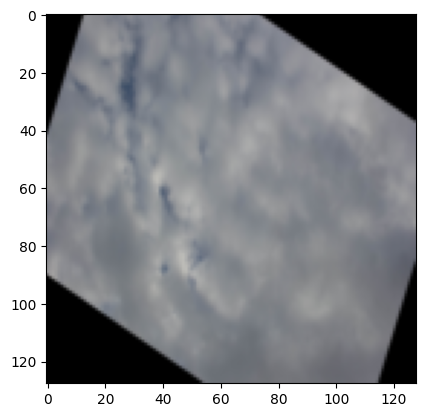

In [6]:
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

first_train_dataloader = DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=1
)

image, label = next(iter(first_train_dataloader))
print(image.shape)
image = image.squeeze().permute(1, 2, 0)
print(image.shape)

plt.imshow(image)
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import Accuracy

class ConvolutionalNet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        # self.num_features = 64 * 16 * 16  # For 64x64 input images
        self.num_features = 64 * 32 * 32  # For 128x128 input images
        self.classifier = nn.Linear(self.num_features, num_classes)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import Accuracy


class VGG16(nn.Module):
    def __init__(self, num_classes=7):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(            
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), # 3 * 128 * 128            
            nn.BatchNorm2d(64),
            # 64 * 128 * 128
            nn.ELU(),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            #nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), # 3 * 128 * 128            
            nn.BatchNorm2d(64),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # nn.Flatten()
        )
        self.layer3 = nn.Sequential(            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # 3 * 128 * 128            
            nn.BatchNorm2d(128),
            nn.ELU(),
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            #nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), # 3 * 128 * 128            
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        self.num_features = 32 * 64 * 64
        self.final_linear_input_size = 4096
        #self.final_feature_size = 128 * (128 // 4) * (128 // 4)
        self.fc = nn.Sequential(     
            nn.Dropout(0.2),
            nn.Linear(self.num_features, self.final_linear_input_size),
            nn.ReLU()
        )
        #self.num_features = 64 * 128 * 128  # For 128x128 input images
        #self.num_features = 32 * 64 * 64
        self.classifier = nn.Linear(self.final_linear_input_size, num_classes)
        #self.classifier = nn.Linear(self.final_feature_size, num_classes)

    def forward(self, x):
        # print(f"Input: {x.shape}")  # Print the input shape
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        #print(f"After Layer 4: {x.shape}")  # Print the input shape
        #print(f"num_features: {self.num_features}")
        x = self.fc(x)
        #x = self.fc[0](x)
        #print(f"After Dropout: {x.shape}")  # After Conv2d
        #x = self.fc[1](x)
        #print(f"After Linear: {x.shape}")  # After BatchNorm2d
        #x = self.fc[2](x)
        #print(f"After ReLU: {x.shape}")  # After BatchNorm2d
        x = self.classifier(x)
        return x
        #print(f"Input: {x.shape}")  # Print the input shape
        #x = self.layer2[0](x)
        #print(f"After Conv2d: {x.shape}")  # After Conv2d
        #x = self.layer2[1](x)
        #print(f"After BatchNorm2d: {x.shape}")  # After BatchNorm2d
        #x = self.layer2[2](x)
        #print(f"After ReLU: {x.shape}")  # After ReLU
        #x = self.layer2[3](x)
        #print(f"After MaxPool2d: {x.shape}")  # After MaxPool2d
        #x = self.layer2[4](x)
        #print(f"After Flatten: {x.shape}")  # After Flatten
        #x = self.classifier(x)
        #return x

In [10]:
num_classes = 7 # 7 different cloud types
vgg16_model = VGG16(num_classes=num_classes)

# Check if CUDA is available and move the model to GPU if it is
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vgg16_model = vgg16_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)

epochs = 1
print(f"Running VGG16 Model - {epochs} epochs at device: {device}")

for epoch in range(epochs):
    
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_dataloader:
        
        # Move images and labels to GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = vgg16_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # Accumulate the running loss
        running_loss += loss.item()
        # Get the predicted classes by taking the argmax of the outputs
        _, predicted = torch.max(outputs, 1)
        # Update the total and correct predictions
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Calculate the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_predictions * 100

    # Print loss and accuracy for the current epoch    
    print(f"Epoch: {epoch + 1}, loss: {epoch_loss}, Accuracy: {epoch_accuracy}")

Running VGG16 Model - 1 epochs at device: cuda
Epoch: 1, loss: 28.350404396653175, Accuracy: 25.326370757180154


In [24]:
num_classes = 7 # 7 different cloud types
convolutionalNet_model = ConvolutionalNet(num_classes=num_classes)

# Check if CUDA is available and move the model to GPU if it is
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

convolutionalNet_model = convolutionalNet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(convolutionalNet_model.parameters(), lr=0.001)

epochs = 10
print(f"Running {epochs} epochs at device: {device}")

for epoch in range(epochs):
    
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_dataloader:
        
        # Move images and labels to GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = convolutionalNet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # Accumulate the running loss
        running_loss += loss.item()
        # Get the predicted classes by taking the argmax of the outputs
        _, predicted = torch.max(outputs, 1)
        # Update the total and correct predictions
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Calculate the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_predictions * 100

    # Print loss and accuracy for the current epoch    
    print(f"Epoch: {epoch + 1}, loss: {epoch_loss}, Accuracy: {epoch_accuracy}")

Running 10 epochs at device: cuda
Epoch: 1, loss: 3.112428536017736, Accuracy: 20.626631853785902
Epoch: 2, loss: 1.714217762152354, Accuracy: 30.026109660574413
Epoch: 3, loss: 1.4276048292716343, Accuracy: 41.38381201044387


KeyboardInterrupt: 

In [46]:
import os
import shutil
import pandas as pd

# Paths
csv_file = 'datasets/clouds/test.csv'
images_dir = 'datasets/clouds/images/test'
output_dir = 'datasets/clouds/images/test_sorted'

# Read the CSV file
df = pd.read_csv(csv_file)
df.head()

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each row in the CSV
for _, row in df.iterrows():
    image_filename = row['id']
    label = row['label']
    class_dir = os.path.join(output_dir, f'class{label}')
    
    # Create the class directory if it doesn't exist
    os.makedirs(class_dir, exist_ok=True)
    
    # Source and destination paths
    src_path = os.path.join(images_dir, image_filename)
    dst_path = os.path.join(class_dir, image_filename)
    
    # Copy the image to the corresponding class directory
    #print(src_path)
    #print(dst_path)
    # Check if the source file exists
    if os.path.exists(src_path):
        # Copy the image to the corresponding class directory
        shutil.copy(src_path, dst_path)
    else:
        print(f"File not found: {src_path}. Skipping.")

print("Images have been sorted into class subdirectories.")

,id
0,3b46f6ebe56ab934da921e184915c03b.jpg
1,9f76ca6c0ef7b1190ea35e61755e00ef.jpg
2,56ed4b7fcd81e9eaed5124ad06360b2f.jpg
3,1415f3f052d1ec4d6d2d37f8e0e5984c.jpg
4,85f426446bb6c35ccf51609daa25d1b3.jpg


In [ ]:
test_transforms = transforms.Compose([    
    transforms.ToTensor(),
    transforms.Resize((128,128)),
])

test_dataset = ImageFolder(
    "datasets/clouds/images/test",
    transform=test_transforms
)

torch.Size([128, 128, 3])


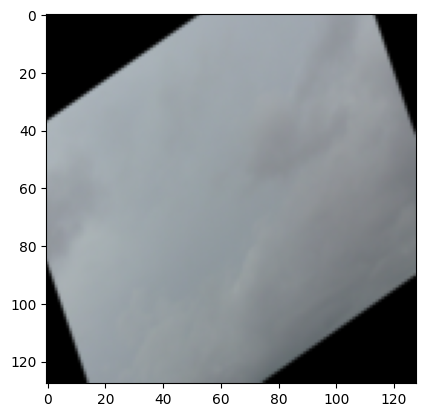

In [56]:
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

test_dataloader = DataLoader(
    test_dataset    
)

image, label = next(iter(test_dataloader))
image = image.squeeze().permute(1, 2, 0)
print(image.shape)

plt.imshow(image)
plt.show()

In [11]:
from torchmetrics import Recall, Precision

recall_per_class = Recall(task="multiclass", num_classes=num_classes, average=None)
recall_micro = Recall(task="multiclass", num_classes=num_classes, average="micro")
recall_macro = Recall(task="multiclass", num_classes=num_classes, average="macro")
recall_wighted = Recall(task="multiclass", num_classes=num_classes, average="weighted")
precision_macro = Precision(task="multiclass", num_classes=num_classes, average="macro")

In [12]:
from torchmetrics import Accuracy, Recall, Precision

precision = Precision(task="multiclass", num_classes=num_classes, average="macro")
recall = Recall(task="multiclass", num_classes=num_classes, average="macro")
accuracy = Accuracy(task="multiclass", num_classes=num_classes)

vgg16_model.eval()
with torch.no_grad():
    correct_predictions = 0
    total_predictions = 0
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg16_model(images)
        #print(outputs.shape)
        value, predicted = torch.max(outputs, 1, keepdim=True)
        #print(predicted.shape)
        # Update the total and correct predictions
        #total_predictions += labels.size(0)
        #correct_predictions += (predicted == labels).sum().item()
        predicted = predicted.squeeze(1).to("cpu")
        labels = labels.to("cpu")
        #print(labels)
        #print(predicted)
        precision(predicted, labels)
        recall(predicted, labels)
        accuracy(predicted, labels)
# acc_custom = correct_predictions / total_predictions * 100
prec = precision.compute()
rec = recall.compute()
acc = accuracy.compute()
print(f"accuracy: {acc}, precision: {prec}, recall: {rec}")
#print(test_dataset.class_to_idx)
recall_dict = {
    k: rec[v].item() for k, v in test_dataset.class_to_idx.items()    
}
precision_dict = {
    k: rec[v].item() for k, v in test_dataset.class_to_idx.items()    
}
accuracy_dict = {
    k: acc[v].item() for k, v in test_dataset.class_to_idx.items()    
}
print(recall_dict)
print(precision_dict)
print(accuracy_dict)

accuracy: 0.1614583283662796, precision: 0.21996641159057617, recall: 0.16147051751613617


AttributeError: 'Subset' object has no attribute 'class_to_idx'

In [ ]:
import pandas as pd

df_test = pd.read_csv("./Datasets/clouds/test.csv")
df_test.head(10)

In [ ]:
import pandas as pd

df_train = pd.read_csv("./Datasets/clouds/train.csv")
df_train.head(10)

In [ ]:
import pandas as pd

df_submit = pd.read_csv("./Datasets/clouds/submit.csv")
df_submit.head(10)

In [ ]:
y_pred_test = model.predict(df_test)
df = pd.read_csv("./Datasets/submit.csv")
counter = 0
for ind in df.index:
  df['predict'][ind] = int(y_pred_test[counter])
  counter = counter + 1
df.to_csv("./submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c cloud-type-classification2 -f submission.csv -m "submission commit"